# Analysis for Project 1 - Part 1

### Group memebers: Esteban, John, Jorge, and Farhad

In [1]:
# Importing the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from matplotlib import transforms

/var/folders/3s/tv18ycn54hs_j2cjwzt3cbg00000gn/T/ipykernel_27820/98384769.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# User defined variables.
FilePaths = ['../data/results_esteban_dev-amd20_10_1000.csv', 
             '../data/results_esteban_local_10_1000.csv', 
             '../data/results_john_dev-intel18_final2.csv', 
             '../data/results_john_local_final2.csv',
             '../data/results_jorge_amd20-v100.csv',
             '../data/results_jorge_m1.csv',
             '../data/results_farhad_intel16.csv',
             '../data/results_farhad_local.csv']
Labels    = ['Esteban_amd20', 'Esteban_local', 'John_intel18', 'John_local', 'Jorge_amd20-v100', 'Jorge_local', 'Farhad_intel16', 'Farhad_local']
TPP_1flop = np.array([166.4, 23.0, 48.0, 15.6, 166.4, 25.6, 33.6, 15.6])            # Theoritical Peak Performance with assumption of 1 flop/cycle.


___
### Load data

In [3]:
# Loading all files and merge them in a DataFrame.
Data = pd.read_csv(FilePaths[3], header=None, names=['matrix size', 'Avg Time', 'Std Time', 'NA'], skiprows=1)[['matrix size']]
for i in range(len(FilePaths)):
    TempData = pd.read_csv(FilePaths[i], header=None, names=['matrix size', 'Avg Time', 'Std Time', 'NA'], skiprows=1).drop('NA', axis=1)
    TempData.rename(columns={'Avg Time': f'Avg_Time_{Labels[i]}', 
                             'Std Time': f'Std_Time_{Labels[i]}'}, inplace=True)
    TempData.drop('matrix size', axis=1, inplace=True)
    Data = pd.concat([Data, TempData], axis=1)

Data

,matrix size,Avg_Time_Esteban_amd20,Std_Time_Esteban_amd20,Avg_Time_Esteban_local,Std_Time_Esteban_local,Avg_Time_John_intel18,Std_Time_John_intel18,Avg_Time_John_local,Std_Time_John_local,Avg_Time_Jorge_amd20-v100,Std_Time_Jorge_amd20-v100,Avg_Time_Jorge_local,Std_Time_Jorge_local,Avg_Time_Farhad_intel16,Std_Time_Farhad_intel16,Avg_Time_Farhad_local,Std_Time_Farhad_local
0,10,0.000025,0.000003,0.000014,0.000002,0.000023,0.000006,0.000035,0.000010,0.000064,0.000003,0.000027,4.517540e-07,0.000021,2.466510e-07,0.000030,0.000001
1,15,0.000071,0.000011,0.000036,0.000001,0.000060,0.000003,0.000088,0.000022,0.000169,0.000004,0.000061,9.035080e-07,0.000059,1.180860e-06,0.000075,0.000002
2,25,0.000278,0.000002,0.000140,0.000003,0.000263,0.000027,0.000390,0.000083,0.000650,0.000028,0.000212,2.321150e-06,0.000242,1.445540e-06,0.000262,0.000005
3,39,0.001006,0.000006,0.000488,0.000012,0.000951,0.000020,0.000826,0.000140,0.002058,0.000124,0.000695,8.542810e-06,0.000891,1.687570e-05,0.000893,0.000032
4,63,0.004177,0.000011,0.002100,0.000294,0.003914,0.000079,0.003669,0.000902,0.006450,0.000628,0.002762,1.201640e-04,0.003679,1.029110e-05,0.003084,0.000241
5,100,0.016470,0.000010,0.007747,0.000252,0.015282,0.000179,0.013895,0.001649,0.016159,0.002315,0.010108,7.071760e-05,0.014476,2.865520e-05,0.011389,0.000296
6,158,0.065218,0.000057,0.030220,0.000319,0.060324,0.000478,0.048709,0.005573,0.046206,0.001105,0.038987,2.267480e-04,0.057249,7.092670e-05,0.044293,0.000373
7,251,0.282071,0.000294,0.122392,0.002483,0.276029,0.001233,0.206128,0.016830,0.206549,0.020149,0.161427,2.792470e-04,0.248899,3.685530e-04,0.239420,0.002915
8,398,1.111600,0.000607,0.492198,0.005056,1.047010,0.017048,0.812013,0.051456,0.926047,0.033303,0.657802,3.208530e-02,0.979832,2.385920e-03,0.911696,0.080453
9,630,4.499180,0.006734,2.015250,0.014763,4.155890,0.030073,3.854800,0.562476,3.916700,0.194481,2.590460,1.060160e-01,3.974410,4.832310e-02,4.066300,0.217744


In [113]:
# Calculating the number of operations.
Data['Mflops'] = (Data['matrix size'] ** 3 - Data['matrix size'] ** 2) * 1e-6

# Calculating the runtime per each operation (Mflops/s).
for col in Data.columns:
    if 'Avg_Time' in col:
        NewCol = col.replace('Avg_Time_', 'Mflops/s_')
        Data[NewCol] = Data['Mflops'] / Data[col]

Data.head()

,matrix size,Avg_Time_Esteban_amd20,Std_Time_Esteban_amd20,Avg_Time_Esteban_local,Std_Time_Esteban_local,Avg_Time_John_intel18,Std_Time_John_intel18,Avg_Time_John_local,Std_Time_John_local,Avg_Time_Jorge_amd20-v100,...,Std_Time_Farhad_local,Mflops,Mflops/s_Esteban_amd20,Mflops/s_Esteban_local,Mflops/s_John_intel18,Mflops/s_John_local,Mflops/s_Jorge_amd20-v100,Mflops/s_Jorge_local,Mflops/s_Farhad_intel16,Mflops/s_Farhad_local
0,10,0.000025,0.000003,0.000014,0.000002,0.000023,0.000006,0.000035,0.000010,0.000064,...,0.000001,0.000900,36.157647,64.544353,38.557768,25.672403,14.142427,33.689822,43.028026,29.577437
1,15,0.000071,0.000011,0.000036,0.000001,0.000060,0.000003,0.000088,0.000022,0.000169,...,0.000002,0.003150,44.064572,88.564247,52.813094,35.976523,18.671424,51.279046,53.694341,41.761348
2,25,0.000278,0.000002,0.000140,0.000003,0.000263,0.000027,0.000390,0.000083,0.000650,...,0.000005,0.015000,54.054054,107.240139,57.039209,38.503893,23.073799,70.898185,61.883230,57.314473
3,39,0.001006,0.000006,0.000488,0.000012,0.000951,0.000020,0.000826,0.000140,0.002058,...,0.000032,0.057798,57.462419,118.518913,60.795651,69.967351,28.085913,83.179705,64.866940,64.723404
4,63,0.004177,0.000011,0.002100,0.000294,0.003914,0.000079,0.003669,0.000902,0.006450,...,0.000241,0.246078,58.905848,117.203999,62.870107,67.063287,38.153343,89.094135,66.881744,79.802956


In [114]:
Data.columns

Index(['matrix size', 'Avg_Time_Esteban_amd20', 'Std_Time_Esteban_amd20',
       'Avg_Time_Esteban_local', 'Std_Time_Esteban_local',
       'Avg_Time_John_intel18', 'Std_Time_John_intel18', 'Avg_Time_John_local',
       'Std_Time_John_local', 'Avg_Time_Jorge_amd20-v100',
       'Std_Time_Jorge_amd20-v100', 'Avg_Time_Jorge_local',
       'Std_Time_Jorge_local', 'Avg_Time_Farhad_intel16',
       'Std_Time_Farhad_intel16', 'Avg_Time_Farhad_local',
       'Std_Time_Farhad_local', 'Mflops', 'Mflops/s_Esteban_amd20',
       'Mflops/s_Esteban_local', 'Mflops/s_John_intel18',
       'Mflops/s_John_local', 'Mflops/s_Jorge_amd20-v100',
       'Mflops/s_Jorge_local', 'Mflops/s_Farhad_intel16',
       'Mflops/s_Farhad_local'],
      dtype='object')

___
### Plot for Question 4: Mflops/s as a function of TPP for different machines.

In [115]:
# First extracting the results.
Local_TPP, Local_Mflops, HPCC_TPP, HPCC_Mflops = [], [], [], []
for i in range(len(Labels)):
    if 'local' in Labels[i]:
        Local_TPP.append(TPP_1flop[i])
        Local_Mflops.append(Data.loc[5, f'Mflops/s_{Labels[i]}'])
    else:
        HPCC_TPP.append(TPP_1flop[i])
        HPCC_Mflops.append(Data.loc[5, f'Mflops/s_{Labels[i]}'])

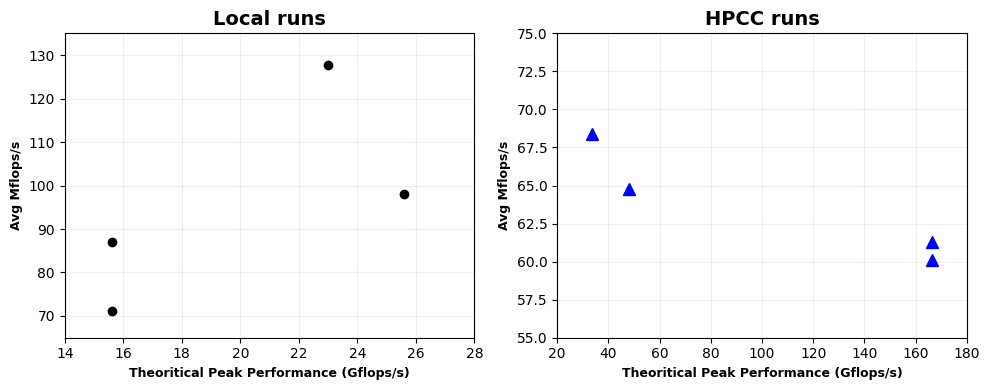

In [104]:
# Plotting the results.
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(Local_TPP, Local_Mflops, color='k', linestyle='', marker='o', ms=6, label='Local runs')
ax[0].grid(alpha=0.2)
ax[0].set_xlabel('Theoritical Peak Performance (Gflops/s)', fontsize=9, fontweight='bold', color='k')
ax[0].set_ylabel('Avg Mflops/s', fontsize=9, fontweight='bold', color='k')
ax[0].set_title('Local runs', fontsize=14, fontweight='heavy', color='k')
ax[0].set_xlim([14, 28])
ax[0].set_ylim([65, 135])

ax[1].plot(HPCC_TPP, HPCC_Mflops, color='b', linestyle='', marker='^', ms=8, label='HPCC runs')
ax[1].grid(alpha=0.2)
ax[1].set_xlabel('Theoritical Peak Performance (Gflops/s)', fontsize=9, fontweight='bold', color='k')
ax[1].set_ylabel('Avg Mflops/s', fontsize=9, fontweight='bold', color='k')
ax[1].set_title('HPCC runs', fontsize=14, fontweight='heavy', color='k')
ax[1].set_xlim([20, 180])
ax[1].set_ylim([55, 75])

plt.tight_layout()
fig.savefig('Part1_Q4_Mflops_vs_TPP.png', format='png', dpi=600)

___
### Plot for Question 5: Mflops/s as a function of N for different machines.

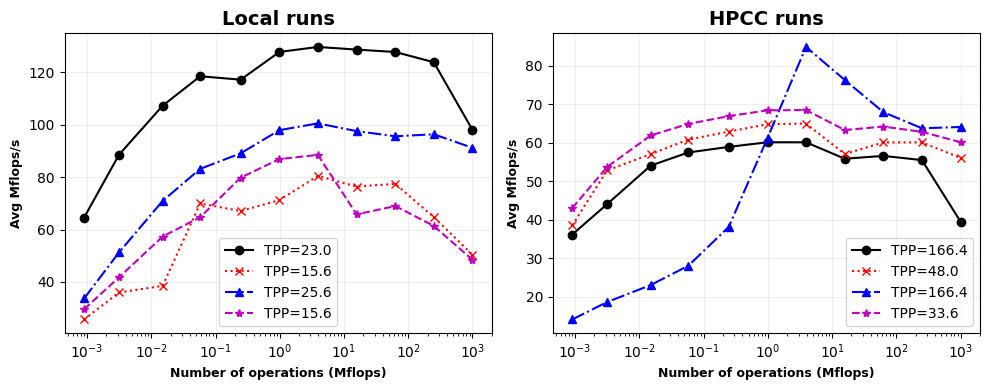

In [134]:
Colors = ['k', 'r', 'b', 'm']
LS     = ['-', ':', '-.', '--']
Markers= ['o', 'x', '^', '*']
idx    = 0

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
for col in Data.columns:
    if 'Mflops/s' in col and 'local' in col:
        TPP = TPP_1flop[Labels.index(col.replace('Mflops/s_', ''))]
        ax[0].semilogx(Data['Mflops'], Data[col], color=Colors[idx], linestyle=LS[idx], 
                       marker=Markers[idx], ms=6, label=f'TPP={TPP}')
        idx += 1
ax[0].grid(alpha=0.2)
ax[0].set_xlabel('Number of operations (Mflops)', fontsize=9, fontweight='bold', color='k')
ax[0].set_ylabel('Avg Mflops/s', fontsize=9, fontweight='bold', color='k')
ax[0].set_title('Local runs', fontsize=14, fontweight='heavy', color='k')
ax[0].legend()

idx = 0
for col in Data.columns:
    if 'Mflops/s' in col and 'local' not in col:
        TPP = TPP_1flop[Labels.index(col.replace('Mflops/s_', ''))]
        ax[1].semilogx(Data['Mflops'], Data[col], color=Colors[idx], linestyle=LS[idx], 
                       marker=Markers[idx], ms=6, label=f'TPP={TPP}')
        idx += 1
ax[1].grid(alpha=0.2)
ax[1].set_xlabel('Number of operations (Mflops)', fontsize=9, fontweight='bold', color='k')
ax[1].set_ylabel('Avg Mflops/s', fontsize=9, fontweight='bold', color='k')
ax[1].set_title('HPCC runs', fontsize=14, fontweight='heavy', color='k')
ax[1].legend()

plt.tight_layout()
fig.savefig('Part1_Q5_Mflops-s_vs_Mflops.png', format='png', dpi=600)

____
# Analysis for Part 2

In [31]:
# User defined variables.
RF = {'farhad_local': {'PP': 14.59, 'L1': 67.41, 'L2': 49.0, 'DRAM': 21.25}, 
      'farhad_intel16': {'PP': 11.96, 'L1': 86.47, 'L2': 68.15, 'DRAM': 16.77},
      'esteban_local': {'PP': 24.11, 'L1': 144.18, 'L2': 88.79, 'DRAM': 25.14},
      'esteban_amd20': {'PP': 13.42, 'L1': 73.26, 'L2': np.nan, 'DRAM': 25.66},
      'jorge_local': {'PP': 32.5, 'L1': 99, 'L2': 66.7, 'DRAM': 43.3},
      'jorge_hpcc': {'PP': 13.4, 'L1': 46, 'L2': np.nan, 'DRAM': 20.3}}

RF2 = {'farhad_local': {'PP': 14.59, 'xPP': 0.21643673, 
                        'L1': 67.41, 'xL1': 0.21643673}}

### Plot the Roofline Model

plot \
     (x <= 2.1643673e-01 ? 6.7410000e+01 * x : 1/0) lc 1 lw 2,\
     (x <= 2.9775510e-01 ? 4.9000000e+01 * x : 1/0) lc 1 lw 2,\
     (x <= 6.8658824e-01 ? 2.1250000e+01 * x : 1/0) lc 1 lw 2,\
     (x >= 2.1643673e-01 ? 1.4590000e+01 : 1/0) lc 3 lw 2

In [4]:
# Loading the images.
img_esteban_local       = mpimg.imread('../ERT_data/RF_esteban_local.png')
img_esteban_amd20       = mpimg.imread('../ERT_data/RF_esteban_amd20.png')
img_farhad_local        = mpimg.imread('../ERT_data/RF_farhad_local.png')
img_farhad_intel16      = mpimg.imread('../ERT_data/RF_farhad_intel16.png')
img_jorge_amd20_v100    = mpimg.imread('../ERT_data/RF_jorge_amd20-v100.png')
img_jorge_local         = mpimg.imread('../ERT_data/RF_jorge_local.png')

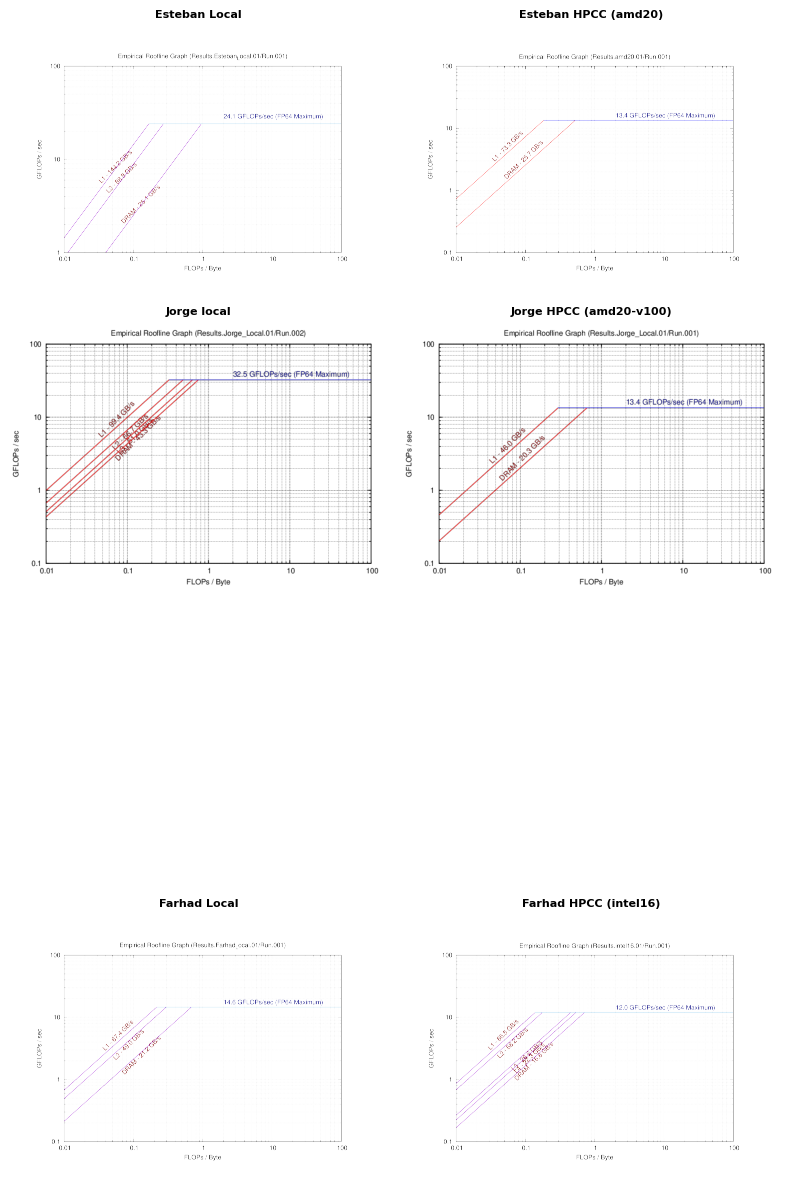

In [7]:
# Plotting the roofline model for the Esteban local.
fig, ax = plt.subplots(4, 2, figsize=(8, 12))
# Place the figures.
ax[0,0].imshow(img_esteban_local)
ax[0,1].imshow(img_esteban_amd20)

ax[1,0].imshow(img_jorge_local)
ax[1,1].imshow(img_jorge_amd20_v100)

ax[3,0].imshow(img_farhad_local)
ax[3,1].imshow(img_farhad_intel16)

# Remove the axis ticks.
for i in range(4):
    for j in range(2):
        ax[i,j].axis('off')

# Add the titles for each graph.
ax[0,0].set_title('Esteban Local', fontsize=8, fontweight='bold', color='k')
ax[0,1].set_title('Esteban HPCC (amd20)', fontsize=8, fontweight='bold', color='k')

ax[1,0].set_title('Jorge local', fontsize=8, fontweight='bold', color='k')
ax[1,1].set_title('Jorge HPCC (amd20-v100)', fontsize=8, fontweight='bold', color='k')

ax[3,0].set_title('Farhad Local', fontsize=8, fontweight='bold', color='k')
ax[3,1].set_title('Farhad HPCC (intel16)', fontsize=8, fontweight='bold', color='k')

fig.tight_layout()
fig.savefig('Part2_Q3_Rooflines.png', format='png', dpi=1000)

In [37]:
np.log10(RF2['farhad_local']['xPP'])

-0.6646690361591739